In [35]:
from sage.all import SymmetricGroup
from sage.combinat.permutation import Permutation

n = 5 
Sn = SymmetricGroup(n)

# This tuple of permutations defines an interesting PCTS that has one cylinder in each direction.
a = Sn((1,2,3,4,5))
b = Sn.identity()
c = Sn((1,4,5,2,3))
d = Sn((1,2,4,5,3))
surface = [a,b,c,d]

# note: this surface is represented by a tuple that is a constellation, i.e. 
# a,b,c,d are elements of the symmetric group, and abcd = id.

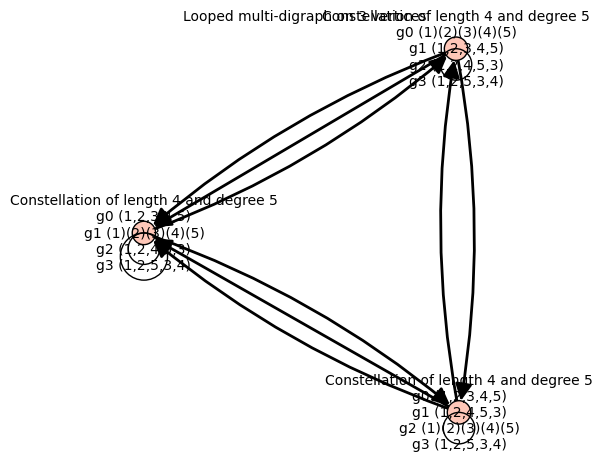

In [42]:
# Goal is to find the orbit of surface under the braid group action defined by:
# s1*(a,b,c,d) = (b,b^-1ab,c,d)
# s2*(a,b,c,d) = (a,c,c^-1bc,d)
# s3*(a,b,c,d) = (a,b,d,d^-1cd)
#
# The Constellation library implements exactly this action of the braid group on
# a constellation, and has implemented the function braid_group_orbit that returns "the graph of the action of the braid group."
# https://doc-10-2--sagemath.netlify.app/html/en/reference/combinat/sage/combinat/constellation#sage.combinat.constellation.Constellation_class.braid_group_orbit
from sage.combinat.constellation import Constellation

star = Constellation(surface)
orbit = star.braid_group_orbit()
orbit

In [48]:
orbit_elements = orbit.connected_components()[0] # not sure what it means if the orbit of this surface has multiple connected components
orbit_elements

[Constellation of length 4 and degree 5
 g0 (1)(2)(3)(4)(5)
 g1 (1,2,3,4,5)
 g2 (1,2,4,5,3)
 g3 (1,2,5,3,4),
 Constellation of length 4 and degree 5
 g0 (1,2,3,4,5)
 g1 (1)(2)(3)(4)(5)
 g2 (1,2,4,5,3)
 g3 (1,2,5,3,4),
 Constellation of length 4 and degree 5
 g0 (1,2,3,4,5)
 g1 (1,2,4,5,3)
 g2 (1)(2)(3)(4)(5)
 g3 (1,2,5,3,4)]

In [52]:
# Now we want to verify if every element (a',b',c',d') in the orbit has the property that ab is an n-cycle.
for el in orbit_elements:
    ab = el.g(0)*el.g(1)
    print(ab)
    print(ab.cycle_type()) 
    print(ab.cycle_type() == [n])

(1,2,3,4,5)
[5]
True
(1,2,3,4,5)
[5]
True
(1,4,3,5,2)
[5]
True
